In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
%matplotlib inline

In [2]:
import seaborn as sns


In [3]:
#scrape 10 years of stock data from Yahoo finance API
yf.pdr_override()
tickers = ['LVMUY', 'MSFT', 'WMT', 'GLD', 'T']
start_date = dt.datetime(2013,3,1)
end_date = dt.datetime(2023,3,1)


portfolio1 = pdr.get_data_yahoo(tickers,start=start_date, end = end_date)['Adj Close']
portfolio1

[*********************100%***********************]  5 of 5 completed


,GLD,LVMUY,MSFT,T,WMT
Date,,,,,
2013-03-01,152.440002,25.368418,23.179544,12.836046,57.456478
2013-03-04,152.300003,25.361019,23.345411,12.914467,58.673855
2013-03-05,152.380005,25.812181,23.511282,13.046357,59.042240
2013-03-06,153.229996,25.834366,23.295656,12.935854,58.769947
2013-03-07,152.690002,26.167187,23.337124,12.971500,58.721897
...,...,...,...,...,...
2023-02-22,169.660004,171.460007,251.509995,19.379999,144.240005
2023-02-23,169.570007,172.759995,254.770004,19.350000,142.089996
2023-02-24,168.350006,165.380005,249.220001,19.240000,142.470001


In [4]:
#check dataframe info
portfolio1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-03-01 to 2023-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     2517 non-null   float64
 1   LVMUY   2517 non-null   float64
 2   MSFT    2517 non-null   float64
 3   T       2517 non-null   float64
 4   WMT     2517 non-null   float64
dtypes: float64(5)
memory usage: 118.0 KB


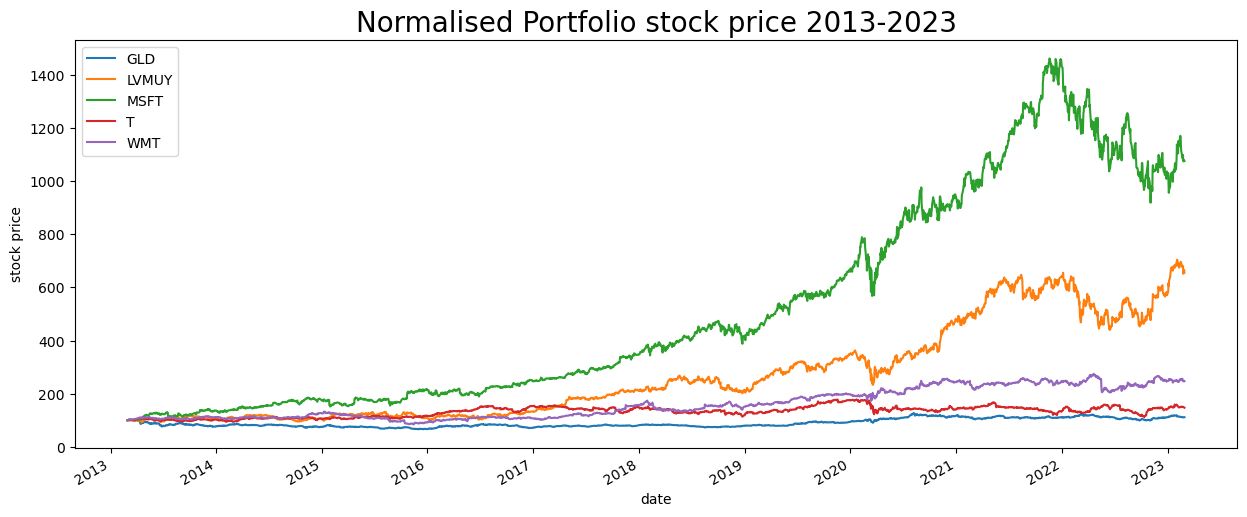

In [5]:
#Plot a graph to show the Normalised Portfolio stock price 2013-2023
(portfolio1 / portfolio1.iloc[0] * 100).plot(figsize = (15, 6));
plt.title('Normalised Portfolio stock price 2013-2023', fontsize=20)
plt.xlabel('date')
plt.ylabel('stock price')
plt.show()

In [6]:
#Calculating the log Return of a Portfolio of Securities

P1_returns = np.log(portfolio1 / portfolio1.shift(1))
P1_returns

,GLD,LVMUY,MSFT,T,WMT
Date,,,,,
2013-03-01,NaN,NaN,NaN,NaN,NaN
2013-03-04,-0.000919,-0.000292,0.007130,0.006091,0.020966
2013-03-05,0.000525,0.017633,0.007080,0.010161,0.006259
2013-03-06,0.005563,0.000859,-0.009213,-0.008506,-0.004623
2013-03-07,-0.003530,0.012801,0.001778,0.002752,-0.000818
...,...,...,...,...,...
2023-02-22,-0.005642,0.000292,-0.004602,0.008811,-0.021196
2023-02-23,-0.000531,0.007553,0.012878,-0.001549,-0.015018
2023-02-24,-0.007221,-0.043657,-0.022025,-0.005701,0.002671


In [7]:
#Annualised returns
P1_annual_returns = P1_returns.mean() * 250
P1_annual_returns

GLD      0.010705
LVMUY    0.187030
MSFT     0.236076
T        0.038497
WMT      0.089995
dtype: float64

In [8]:
#Annualised covariance matrix
P1_cov_matrix_a = P1_returns.cov() * 250
P1_cov_matrix_a

,GLD,LVMUY,MSFT,T,WMT
GLD,0.022774,0.002289,0.000952,0.001203,0.001061
LVMUY,0.002289,0.081698,0.039380,0.020962,0.015925
MSFT,0.000952,0.039380,0.073846,0.018742,0.019631
T,0.001203,0.020962,0.018742,0.044885,0.014214
WMT,0.001061,0.015925,0.019631,0.014214,0.042121


Text(50.722222222222214, 0.5, 'Stocks')

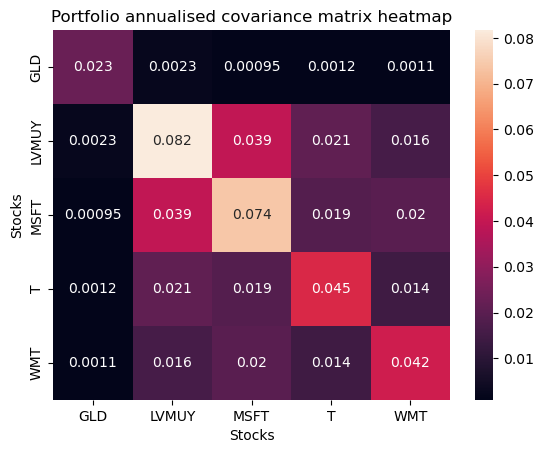

In [9]:
sns.heatmap(P1_cov_matrix_a,annot=True)
plt.title('Portfolio annualised covariance matrix heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')

In [10]:
#Finding correlation between stocks in the portfolio
P1_corr_matrix = P1_returns.corr()
P1_corr_matrix

,GLD,LVMUY,MSFT,T,WMT
GLD,1.000000,0.053062,0.023224,0.037616,0.034264
LVMUY,0.053062,1.000000,0.507004,0.346158,0.271477
MSFT,0.023224,0.507004,1.000000,0.325535,0.351990
T,0.037616,0.346158,0.325535,1.000000,0.326897
WMT,0.034264,0.271477,0.351990,0.326897,1.000000


Text(50.722222222222214, 0.5, 'Stocks')

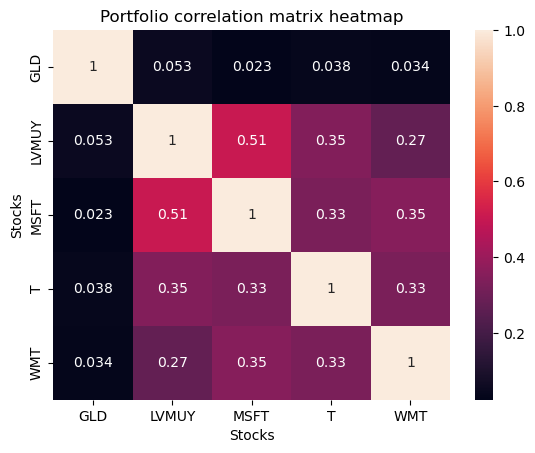

In [11]:
sns.heatmap(P1_corr_matrix,annot=True)
plt.title('Portfolio correlation matrix heatmap')
plt.xlabel('Stocks')
plt.ylabel('Stocks')